In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#라이브러리 및 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
train = pd.read_csv("**")
test = pd.read_csv("**")
submission = pd.read_csv("**")

print("train shape:", train.shape)
print("test shape:", test.shape)
print()

print(train.info())
train.head()


train shape: (8932, 12)
test shape: (3828, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB
None


,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [ ]:
##id와 name은 분석에 필요 없으므로 삭제
train = train.drop(["id", "name"], axis=1)
test = test.drop(["id", "name"], axis=1)
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


#EDA

##범주형(continent, contract_untill, position, prefer_foot)

### 값 및 시각화 확인

In [ ]:
obj_columns = ["continent", "contract_until", "position", "prefer_foot"]
print(obj_columns)

def col_val_cnts(df, col_list):
  for col in col_list:
    print(f"\n{col} value counts")
    print(df[col].value_counts())
    print("="*100)

col_val_cnts(train, obj_columns)

train["contract_until"] = pd.to_datetime(train["contract_until"]).dt.year

col_val_cnts(train, obj_columns)

['continent', 'contract_until', 'position', 'prefer_foot']

continent value counts
europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64

contract_until value counts
2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

position value counts
MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64

prefer_foot value counts
right    6837
left     2095
Name: prefer_foot, dtype: int64

continent value counts
europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64

contract_

In [ ]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


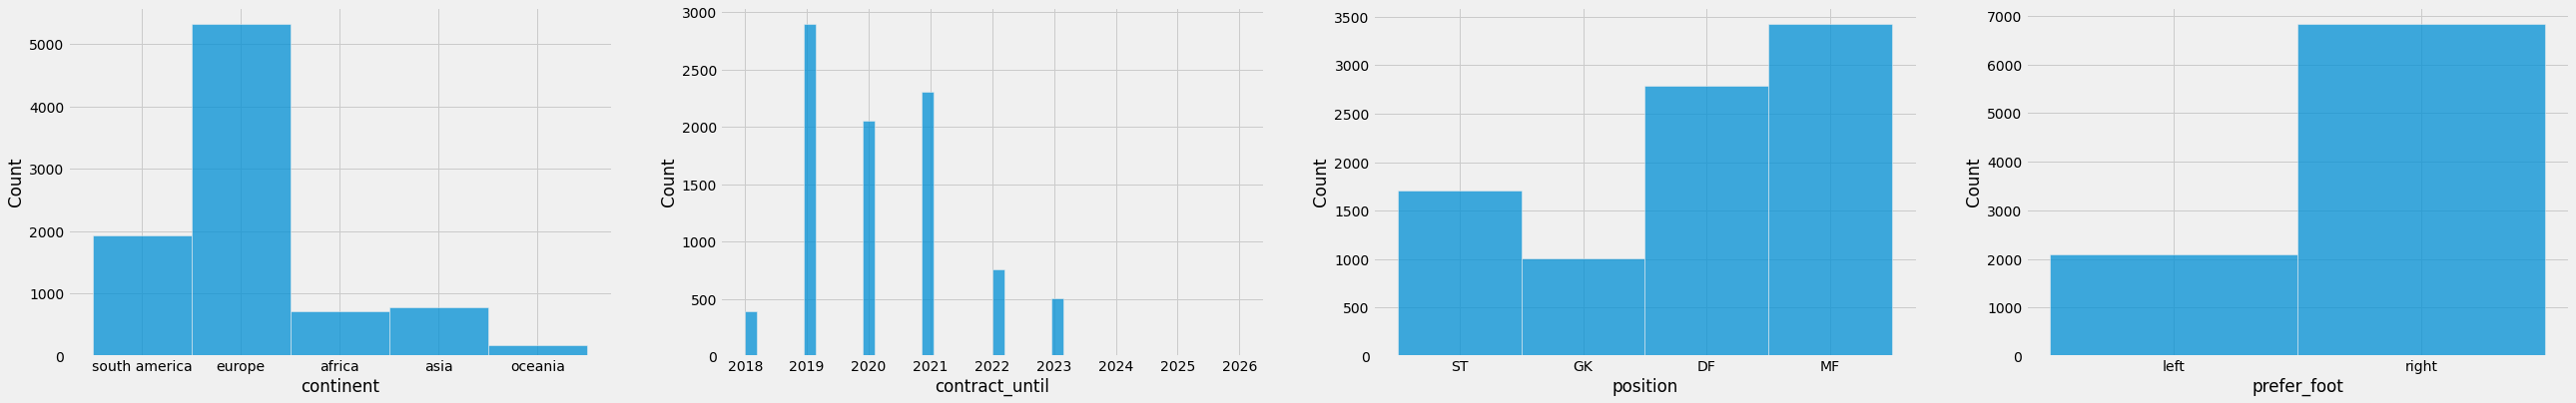

In [ ]:
def obj_hist(df, col_list):
  f, ax = plt.subplots(1, len(col_list), figsize=(40, 6))
  for i in range(len(col_list)):
    sns.histplot(df, x=col_list[i], ax=ax[i])

obj_hist(train, obj_columns)

### insight
- europe선수가 압도적으로 많다.(다합쳐도 europe에 안된다)
- 2019, 2020, 2021년에 끝나는 사람이 많다.
- 미드필더가 제일 많음, 골키퍼가 꽤 많음
- 오른발잡이가 왼발잡이에 3배 이상

### 예측값과 범주형 데이터의 관계 확인 및 시각화

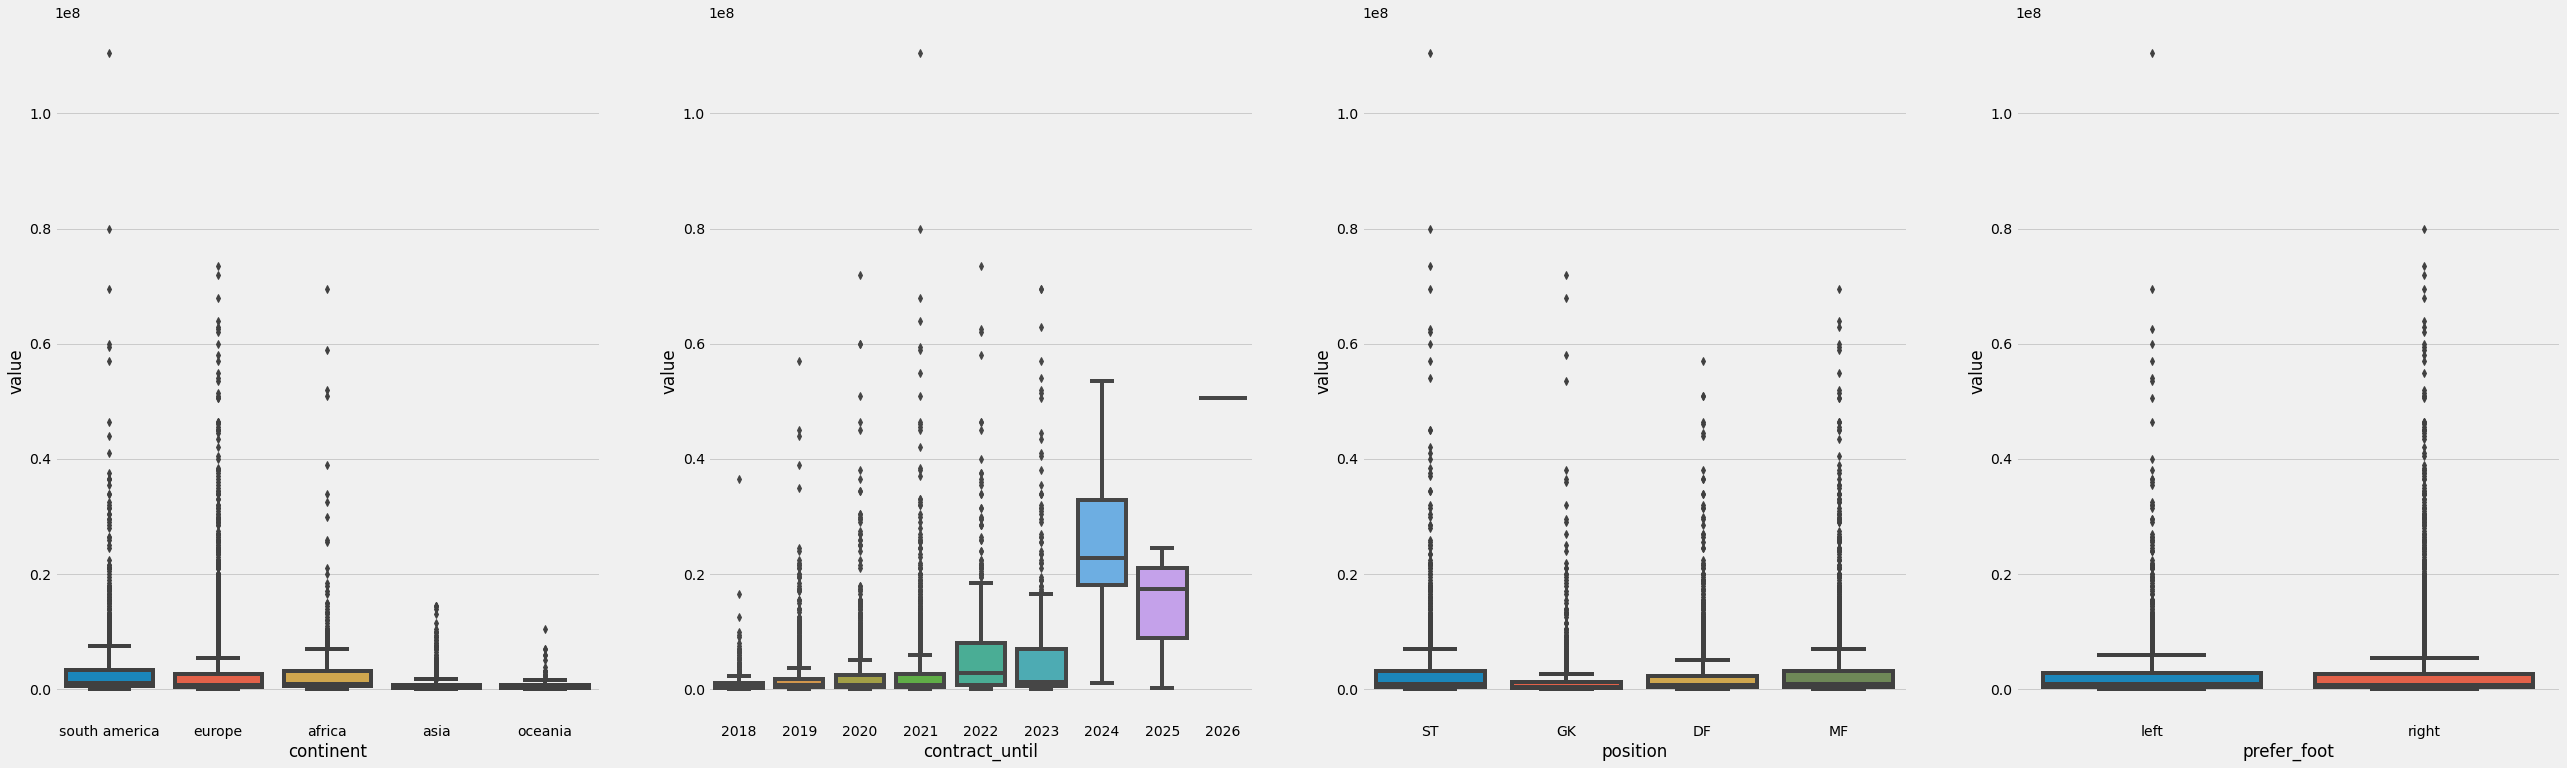

In [ ]:
f, ax = plt.subplots(1, len(obj_columns), figsize=(40, 12))
ax = ax.flatten()
for i in range(len(obj_columns)):
  sns.boxplot(data=train, x=obj_columns[i], y="value", ax=ax[i]);

###insight
- south america와 africa의 이상치가 크게 나타남
- 특정 선수의 값어치가 심하게 큰것으로 나타남
- 24년과 25년에 계약이 끝나는 선수의 가치가 큼
- gk의 가치가 가장 낮음, st의 값어치가 튐
- 왼발잡이와 오른발잡이의 값어치는 비슷함

##연속형(age, reputation, stat_overall, state_potential, stat_skill_moves)

### 시각화 및 분포 확인

['age', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']


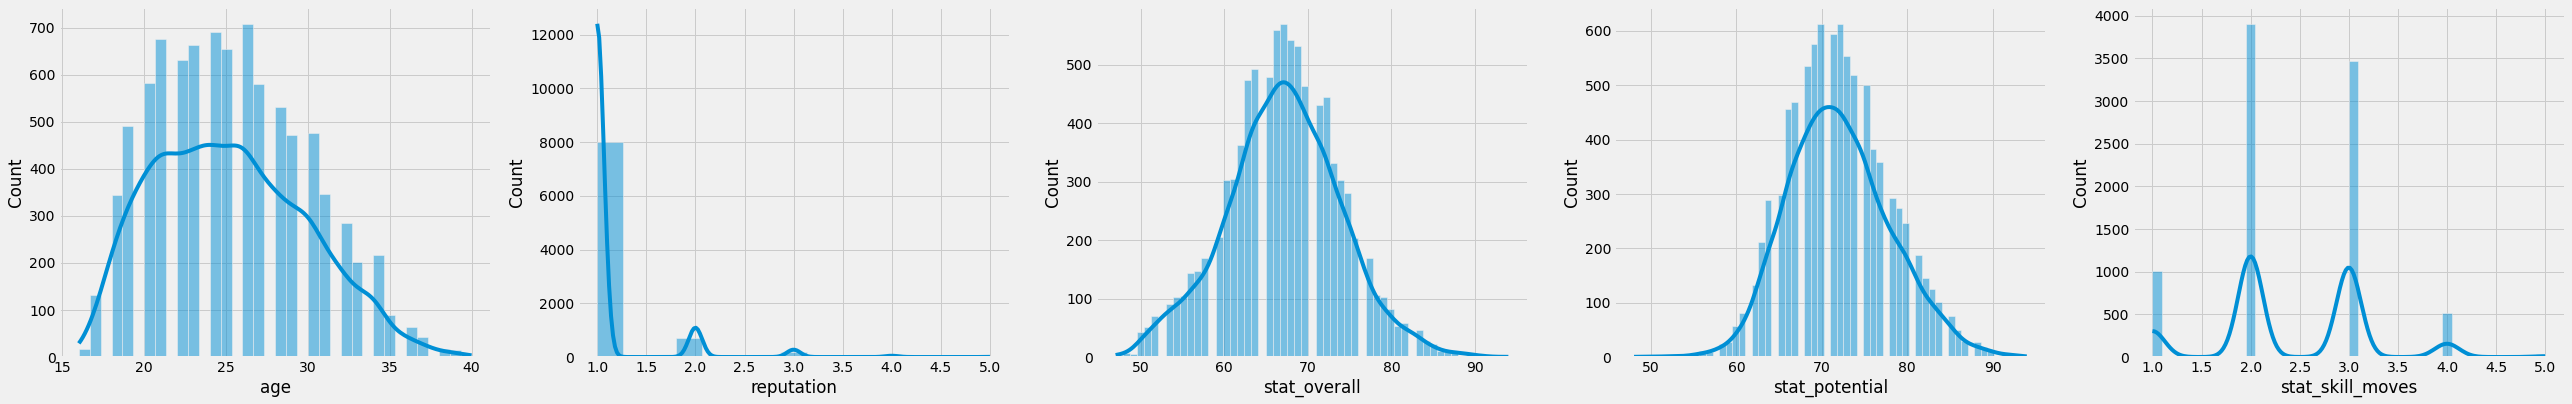

In [ ]:
#시각화
numerical_cols = ["age", "reputation", "stat_overall", "stat_potential", "stat_skill_moves"]
print(numerical_cols)

f, ax = plt.subplots(1, len(numerical_cols), figsize=(40, 6))
for i in range(len(numerical_cols)):
  sns.histplot(data=train, x=numerical_cols[i], ax=ax[i], kde=True )

### Insight
- 나이는 20세 ~ 27세에 가장 많음 -> 30세 부터 줄어듬
- 인기도는 1이 가장 많음
- 현재 능력은 70점을 중앙값으로 갖고 양쪽으로 하향
- 잠재 능력은 현재능력과 비슷한 분포
- 기술능력은 2, 3이 가장 많고 1의 3배 이상, 4의 6배 이상, 5는 없음

### 예측값(value)과 연속형 변수간의 관계 확인 및 시각화

<Figure size 576x360 with 0 Axes>

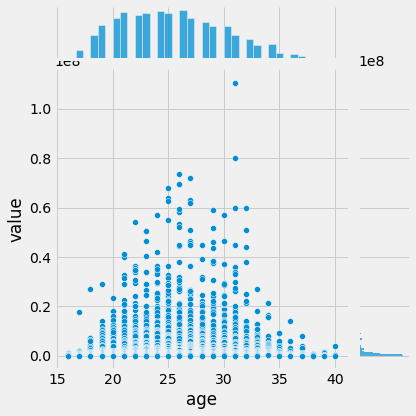

<Figure size 576x360 with 0 Axes>

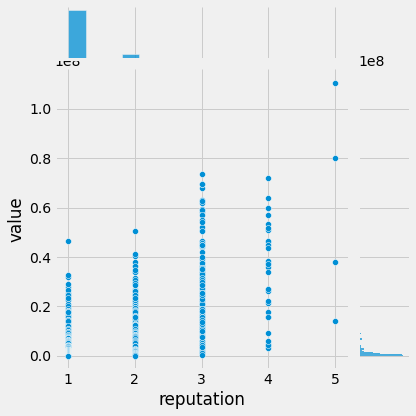

<Figure size 576x360 with 0 Axes>

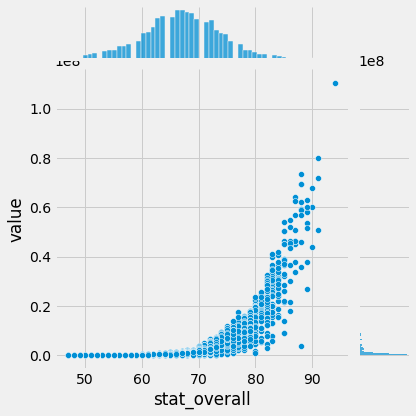

<Figure size 576x360 with 0 Axes>

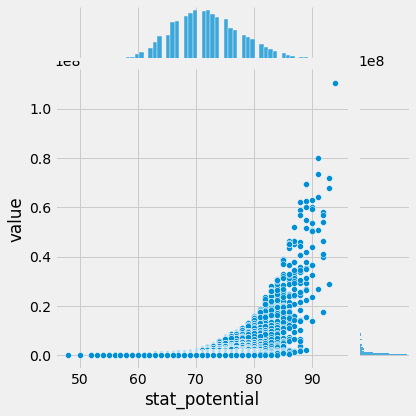

<Figure size 576x360 with 0 Axes>

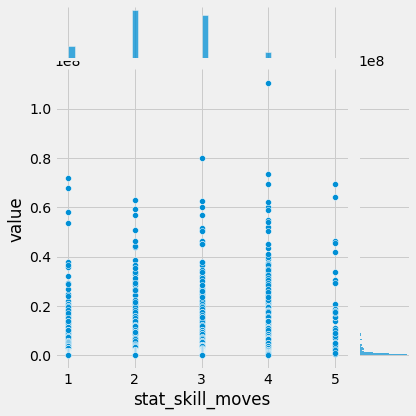

In [ ]:
nrows = 3
ncols = 2
# f, ax = plt.subplots(1,2, figsize=(15, 20))
for i in range(len(numerical_cols)):
  plt.figure(figsize=(8, 5))
  sns.jointplot(data=train, x=numerical_cols[i], y="value");

###insight
- 나이는 25세에서 30세가 가장 값어치가 높고 30세 이후로는 급격히 감소(이상치제거 필요 가능성)
- 현재 능력은 올라갈수록 값어치가 급격하게 상승(이산형으로 계산 가능성)
- 잠재 능력은 올라갈수록 값어치가 급격하게 상승(이산형으로 계산 가능성)
- 기술능력은 4가 값어치가 가장 높음

##전체 컬럼 상관관계

###pairplot

In [ ]:
# sns.pairplot(train, palette="dark");

###heatmap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


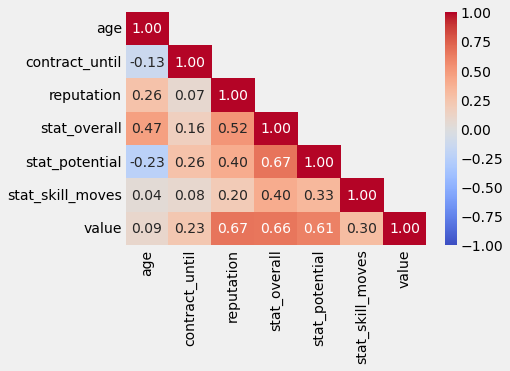

In [ ]:
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, 1)] = True
print(corr.style.background_gradient(cmap="coolwarm"))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap="coolwarm")

In [ ]:
corr.style.background_gradient(cmap = "coolwarm")

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,value
age,1.000000,-0.132052,0.263468,0.467345,-0.231303,0.039362,0.087319
contract_until,-0.132052,1.000000,0.070446,0.156983,0.258477,0.082641,0.228638
reputation,0.263468,0.070446,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,0.467345,0.156983,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.231303,0.258477,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,0.039362,0.082641,0.196582,0.400164,0.332578,1.000000,0.298500
value,0.087319,0.228638,0.665982,0.658444,0.611907,0.298500,1.000000


###insight
- 나이의 경우 상관이 많이 없다고 나옴
- raputation(인기도), stat_overall(현재능력치), stat_potential(잠재능력치)가 가장 상관이 높음
- stat_overall(현재능력치)와 stat_potential(잠재능력치)는 상관이 높음

<분석에 사용할 변수>

- 범주형변수: continent(라벨링), prefer_foot(라벨링), position(라벨링), contract_untill
- 연속형변수: age(로그변환), reputation(로그변환), stat_overall(로그변환), stat_potential(로그변환), 
- target: value(로그변환)

#데이터 전처리

###데이터 재정의

In [ ]:
train_df = train[["age", "continent", "contract_until", "position", "prefer_foot", "reputation", "stat_overall", "stat_potential", "value"]]
test_df = test[["age", "continent", "contract_until", "position", "prefer_foot", "reputation", "stat_overall", "stat_potential"]]
print(train_df.shape)
print(test_df.shape)

(8932, 9)
(3828, 8)


###결측값확인: 결측값 없는 컬럼 없음

###라벨링 및 더미처리

In [ ]:
train_df.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,value
0,31,south america,2021,ST,left,5.0,94,94,110500000.0
1,27,europe,2020,GK,right,4.0,91,93,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,68000000.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

cate_col = ["continent", "contract_until", "position", "prefer_foot"]

#cate_col 변수들 라벨인코딩
train_df[cate_col] = train_df[cate_col].apply(LabelEncoder().fit_transform)
test_df[cate_col] = test_df[cate_col].apply(LabelEncoder().fit_transform)

#데이터 유형변경
train_df[cate_col] = train_df[cate_col].astype("category")
test_df[cate_col] = train_df[cate_col].astype("category")

#더미처리
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


###파생변수형성: 생성하지 않음

##데이터 분포 변환

In [ ]:
train_df.head()

,age,reputation,stat_overall,stat_potential,value,continent_0,continent_1,continent_2,continent_3,continent_4,...,contract_until_5,contract_until_6,contract_until_7,contract_until_8,position_0,position_1,position_2,position_3,prefer_foot_0,prefer_foot_1
0,31,5.0,94,94,110500000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,27,4.0,91,93,72000000.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,31,5.0,91,91,80000000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,32,4.0,91,91,51000000.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,25,3.0,90,93,68000000.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
log_col = ["age", "reputation", "stat_overall"]

train_df[log_col] = np.log1p(train_df[log_col])
train_df["value"] = np.log1p(train_df["value"])

test_df[log_col] = np.log1p(test_df[log_col])

train_df.head()

,age,reputation,stat_overall,stat_potential,value,continent_0,continent_1,continent_2,continent_3,continent_4,...,contract_until_5,contract_until_6,contract_until_7,contract_until_8,position_0,position_1,position_2,position_3,prefer_foot_0,prefer_foot_1
0,3.465736,1.791759,4.553877,94,18.520526,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,3.332205,1.609438,4.521789,93,18.092177,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,3.465736,1.791759,4.521789,91,18.197537,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,3.496508,1.609438,4.521789,91,17.747336,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3.258097,1.386294,4.510860,93,18.035018,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


###스케일링

In [ ]:
print(train_df.shape)
print(test_df.shape)

test_df.head()

(8932, 25)
(3828, 24)


,age,reputation,stat_overall,stat_potential,continent_0,continent_1,continent_2,continent_3,continent_4,contract_until_0,...,contract_until_5,contract_until_6,contract_until_7,contract_until_8,position_0,position_1,position_2,position_3,prefer_foot_0,prefer_foot_1
0,3.526361,1.791759,4.553877,94,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,3.295837,1.791759,4.532599,93,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,3.332205,1.609438,4.521789,92,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,3.332205,1.609438,4.521789,91,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3.496508,1.609438,4.521789,91,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scale_list = train_df.columns.tolist()
scale_list.remove("value")

ss.fit(train_df[scale_list])

train_df[scale_list] = ss.transform(train_df[scale_list])
test_df[scale_list] = ss.transform(test_df[scale_list])

print(train_df.shape)
print(test_df.shape)
train_df.head()

(8932, 25)
(3828, 24)


,age,reputation,stat_overall,stat_potential,value,continent_0,continent_1,continent_2,continent_3,continent_4,...,contract_until_5,contract_until_6,contract_until_7,contract_until_8,position_0,position_1,position_2,position_3,prefer_foot_0,prefer_foot_1
0,1.219937,6.840454,3.319425,3.674598,18.520526,-0.296326,-0.310844,-1.214182,-0.141365,1.906616,...,-0.245056,-0.036678,-0.01833,-0.010582,-0.674156,-0.356663,-0.789189,2.058813,1.806512,-1.806512
1,0.462859,5.651725,3.004450,3.507592,18.092177,-0.296326,-0.310844,0.823600,-0.141365,-0.524489,...,-0.245056,-0.036678,-0.01833,-0.010582,-0.674156,2.803767,-0.789189,-0.485717,-0.553553,0.553553
2,1.219937,6.840454,3.004450,3.173580,18.197537,-0.296326,-0.310844,-1.214182,-0.141365,1.906616,...,-0.245056,-0.036678,-0.01833,-0.010582,-0.674156,-0.356663,-0.789189,2.058813,-0.553553,0.553553
3,1.394402,5.651725,3.004450,3.173580,17.747336,-0.296326,-0.310844,0.823600,-0.141365,-0.524489,...,-0.245056,-0.036678,-0.01833,-0.010582,1.483336,-0.356663,-0.789189,-0.485717,-0.553553,0.553553
4,0.042692,4.196838,2.897171,3.507592,18.035018,-0.296326,-0.310844,0.823600,-0.141365,-0.524489,...,-0.245056,-0.036678,-0.01833,-0.010582,-0.674156,2.803767,-0.789189,-0.485717,-0.553553,0.553553


##데이터 재정의

In [ ]:
X = train_df.drop(["value"], axis=1)
y = train_df["value"]
test_df = test_df

print("X shape:", X.shape)
print("y shape:", y.shape)
print("test_df shape:", test_df.shape)

X shape: (8932, 24)
y shape: (8932,)
test_df shape: (3828, 24)


#데이터 모델링

4-1) NGBRegressor with cross_val_score

4-2) CatBoostRegressor with GridSearchCV

4-3) XGBoostRegressor + BayesianOptimization

4-4) LGBMRegressor + BayesianOptimization

4-5) GradientBoostingRegressor + BayesianOptimization

4-6) VotingRegressor

4-7) StackingCVRegressor

Ensemble



In [ ]:
!pip install bayesian-optimization
!pip install ngboost
!pip install catboost

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import *

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

from lightgbm import LGBMRegressor
from ngboost import NGBRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor

In [ ]:
test

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,europe,2022,ST,right,5.0,94,94,5.0
1,26,south america,2022,ST,right,5.0,92,93,5.0
2,27,europe,2023,MF,right,4.0,91,92,4.0
3,27,europe,2020,ST,right,4.0,91,91,4.0
4,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...
3823,20,asia,2021,MF,right,1.0,48,63,2.0
3824,18,europe,2018,GK,right,1.0,48,65,1.0
3825,18,south america,2021,MF,right,1.0,48,65,2.0
3826,18,europe,2020,ST,right,1.0,47,61,2.0


##NGBRegressor

In [ ]:
ngb = NGBRegressor(random_state=156)
cv_ngb = cross_val_score(ngb, X, y,
                         cv=KFold(n_splits=4, random_state=156, shuffle=True),
                         scoring="neg_mean_squared_error")
cv_ngb.mean()

[iter 0] loss=1.7513 val_loss=0.0000 scale=1.0000 norm=1.2806
[iter 100] loss=0.7559 val_loss=0.0000 scale=2.0000 norm=1.1118
[iter 200] loss=-0.1090 val_loss=0.0000 scale=2.0000 norm=0.9202
[iter 300] loss=-0.7826 val_loss=0.0000 scale=2.0000 norm=0.8074
[iter 400] loss=-1.1148 val_loss=0.0000 scale=2.0000 norm=0.8380
[iter 0] loss=1.7562 val_loss=0.0000 scale=1.0000 norm=1.2860
[iter 100] loss=0.7712 val_loss=0.0000 scale=2.0000 norm=1.1183
[iter 200] loss=-0.0911 val_loss=0.0000 scale=2.0000 norm=0.9205
[iter 300] loss=-0.7603 val_loss=0.0000 scale=2.0000 norm=0.8117
[iter 400] loss=-1.0841 val_loss=0.0000 scale=2.0000 norm=0.8446
[iter 0] loss=1.7583 val_loss=0.0000 scale=1.0000 norm=1.2887
[iter 100] loss=0.7947 val_loss=0.0000 scale=2.0000 norm=1.1307
[iter 200] loss=-0.0729 val_loss=0.0000 scale=2.0000 norm=0.9252
[iter 300] loss=-0.7545 val_loss=0.0000 scale=2.0000 norm=0.8103
[iter 400] loss=-1.0959 val_loss=0.0000 scale=2.0000 norm=0.8379
[iter 0] loss=1.7605 val_loss=0.0000 

-0.00892554005169099

In [ ]:
ngb.fit(X,y)
ngb_pred = np.expm1(ngb.predict(test_df))
print(ngb_pred)

[iter 0] loss=1.7566 val_loss=0.0000 scale=1.0000 norm=1.2863
[iter 100] loss=0.7619 val_loss=0.0000 scale=2.0000 norm=1.1142
[iter 200] loss=-0.1026 val_loss=0.0000 scale=2.0000 norm=0.9204
[iter 300] loss=-0.7746 val_loss=0.0000 scale=2.0000 norm=0.8097
[iter 400] loss=-1.1098 val_loss=0.0000 scale=2.0000 norm=0.8452
[5.14851138e+07 5.89777011e+07 8.59559943e+07 ... 4.94397880e+04
 5.19361717e+04 4.77144383e+04]


##CatBoostRegressor

In [ ]:
# cbr= CatBoostRegressor(random_state=156)
# cv_cbr = cross_val_score(cbr, X, y, cv=KFold(n_splits=4, random_state=156, shuffle=True), scoring="neg_mean_squared_error")
# print(type(cv_cbr))
# print(cv_cbr.mean())

param_grid = {'depth' : [2,3,4,5,6,7,8,9,10], 'learning_rate' : [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.25]}
grid_cat = GridSearchCV(estimator=CatBoostRegressor(random_state=156), param_grid=param_grid, n_jobs=-1, scoring="neg_mean_squared_error",
                        cv=KFold(n_splits=4, random_state=42, shuffle=True), refit=True)

grid_cat.fit(X, y)
print(grid_cat.best_estimator_)


cbr = grid_cat.best_estimator_
cbr.fit(X, y)
cbr_pred = np.expm1(cbr.predict(test_df))
print(cbr_pred)

0:	learn: 1.2874667	total: 48.1ms	remaining: 48s
1:	learn: 1.1836624	total: 50.7ms	remaining: 25.3s
2:	learn: 1.0919850	total: 52.7ms	remaining: 17.5s
3:	learn: 1.0074368	total: 54.3ms	remaining: 13.5s
4:	learn: 0.9297250	total: 55.9ms	remaining: 11.1s
5:	learn: 0.8596416	total: 57.6ms	remaining: 9.54s
6:	learn: 0.7969047	total: 59.2ms	remaining: 8.4s
7:	learn: 0.7341749	total: 60.9ms	remaining: 7.55s
8:	learn: 0.6806231	total: 62.5ms	remaining: 6.88s
9:	learn: 0.6310358	total: 64.2ms	remaining: 6.36s
10:	learn: 0.5878173	total: 65.9ms	remaining: 5.92s
11:	learn: 0.5470677	total: 67.6ms	remaining: 5.57s
12:	learn: 0.5121459	total: 69.2ms	remaining: 5.25s
13:	learn: 0.4790252	total: 71.1ms	remaining: 5.01s
14:	learn: 0.4497765	total: 73.1ms	remaining: 4.8s
15:	learn: 0.4209281	total: 75ms	remaining: 4.61s
16:	learn: 0.3953441	total: 76.7ms	remaining: 4.43s
17:	learn: 0.3731483	total: 78.7ms	remaining: 4.29s
18:	learn: 0.3513975	total: 80.1ms	remaining: 4.14s
19:	learn: 0.3322558	total: 

## XGBoostRegressor + BayesianOptimization

In [ ]:
from bayes_opt import BayesianOptimization

pbounds = {"learning_rate": (0.0001, 0.4),
           "n_estimators": (16, 1024),
           "max_depth": (3, 10),
           "subsample": (0.5, 1),
           "colsample_bytree": (0.5, 1),
           "gamma": (0, 5)
           }

def xgb_opt(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, gamma):
    
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample': colsample_bytree,   
        'gamma': gamma,
        'n_jobs' : -1,
        'random_state' : 777
    }
    
    xgb = XGBRegressor(**params)
    
    kf = KFold(n_splits = 4 , shuffle=True, random_state=50)

    score = cross_val_score(xgb, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
    
    return np.mean(score)

BO_xgb = BayesianOptimization(f = xgb_opt, pbounds = pbounds, random_state=0)

BO_xgb.maximize(init_points = 10, n_iter = 200)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.01778  |  0.7744   |  3.576    |  0.2411   |  6.814    |  443.0    |  0.8229   |
|  2        | -0.02459  |  0.7188   |  4.459    |  0.3855   |  5.684    |  814.1    |  0.7644   |
|  3        | -22.44    |  0.784    |  4.628    |  0.02851  |  3.61     |  36.38    |  0.9163   |
|  4        | -0.02193  |  0.8891   |  4.35     |  0.3914   |  8.594    |  481.2    |  0.8903   |
|  5        | -0.01549  |  0.5591   |  3.2      |  0.05743  |  9.613    |  542.0    |  0.7073   |
|  6        | -0.01734  |  0.6323   |  3.871    |  0.1825   |  6.979    |  34.94    |  0.8088   |
|  7        | -0.02093  |  0.806    |  3.085    |  0.3775   |  7.773    |  378.4    |  0.7185   |
|  8        | -0.009741 |  0.8488   |  0.3011   |  0.2667   |  7.694    |  228.1    |  0.5645   |
|  9        | -0.014

In [ ]:
params = BO_xgb.max["params"]
print(params)
params["max_depth"] = int(round(params["max_depth"]))
params["n_estimators"] = int(round(params["n_estimators"]))

# params = BO_xgb.max['params']
# params['max_depth'] = int(round(params['max_depth']))
# params['n_estimators'] = int(round(params['n_estimators']))


# xgb = XGBRegressor(**params)
# xgb.fit(X, y)
# xgb_pred = np.expm1(xgb.predict(test))
# print(xgb_pred)

xgb = XGBRegressor(random_state = 777, **params)

xgb.fit(X, y)
pred_xgb = np.expm1(xgb.predict(test_df))

{'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.4, 'max_depth': 3.0, 'n_estimators': 375.5740376233732, 'subsample': 1.0}
[05:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


##LGBMRegressor + BayesianOptimization

In [ ]:
from bayes_opt import BayesianOptimization

pbounds = {"max_depth": (3, 10),
           "learning_rate": (0.0005, 0.2),
           "n_estimators": (16, 1024),
           "subsample": (0.5, 1),
           "colsample_bytree": (0.5, 1),
           "num_leaves": (2, 16),
           "min_child_weight": (1, 10)}

def lgbm_opt(max_depth, learning_rate, n_estimators, subsample, colsample_bytree, num_leaves, min_child_weight):
  params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'colsample_bytree' : colsample_bytree,
        'num_leaves' : int(round(num_leaves)),
        'min_child_weight' : min_child_weight,
        'n_jobs' : -1}
  
  lgbm = LGBMRegressor(**params)
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  # score = cross_val_score(estimator=lgbm, X, y, scoring="neg_mean_squared_error", cv=kf, n_jobs=-1)
  score = cross_val_score(lgbm, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
  return np.mean(score)

BO_lgbm = BayesianOptimization(f=lgbm_opt, pbounds=pbounds, verbose=2)
BO_lgbm.maximize(init_points=10, n_iter=200)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.005997 |  0.7147   |  0.06221  |  7.193    |  6.667    |  881.0    |  13.07    |  0.6203   |
|  2        | -0.005983 |  0.6809   |  0.1597   |  8.494    |  2.771    |  847.4    |  12.93    |  0.6651   |
|  3        | -0.008046 |  0.5662   |  0.141    |  5.695    |  6.564    |  173.7    |  13.16    |  0.8761   |
|  4        | -0.01009  |  0.7569   |  0.1918   |  6.807    |  2.836    |  60.93    |  10.08    |  0.9269   |
|  5        | -0.00701  |  0.8367   |  0.04864  |  5.645    |  8.718    |  442.7    |  10.83    |  0.8202   |
|  6        | -0.01861  |  0.5885   |  0.06777  |  9.857    |  2.061    |  343.4    |  2.007    |  0.5812   |
|  7        | -0.006988 |  0.8371   |  0.1398   |  4.638    |  5.884    |  179.7    |  14.92    |  0.6294   |
|  8      

In [ ]:
params = BO_lgbm.max["params"]
params["max_depth"] = int(round(params["max_depth"]))
params["n_estimators"] = int(round(params["n_estimators"]))
params["num_leaves"] = int(round(params["num_leaves"]))

lgbm = LGBMRegressor(seed=1000, **params)
lgbm.fit(X, y)
lgbm_pred = np.expm1(lgbm.predict(test_df))

##GradientBoosingRegressor + BayesianOptimization

In [ ]:
from bayes_opt import BayesianOptimization

pbounds = { 'learning_rate': (0.0005, 0.2),
            'n_estimators': (16, 512),
            'max_depth': (3,10),   
            'subsample': (0.5,1), 
            'min_samples_split': (2,5),   
            'min_samples_leaf': (1,5)}

def gbm_opt(learning_rate, n_estimators, max_depth, subsample, min_samples_split, min_samples_leaf):
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'min_samples_split' : int(round(min_samples_split)),
        'min_samples_leaf' : int(round(min_samples_leaf))}

    gbm = GradientBoostingRegressor(**params)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(gbm, X, y, scoring="neg_mean_squared_error", cv=kf, n_jobs=-1)
    
    return np.mean(score)

BO_gbm = BayesianOptimization(f=gbm_opt, pbounds=pbounds, random_state=150, verbose=2)
BO_gbm.maximize(init_points=10, n_iter=200)    

|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.00639  |  0.1818   |  4.806    |  4.511    |  4.217    |  362.2    |  0.7586   |
|  2        | -0.00864  |  0.1904   |  9.396    |  1.313    |  4.347    |  72.38    |  0.8204   |
|  3        | -0.006432 |  0.01641  |  4.624    |  2.544    |  2.71     |  511.2    |  0.6947   |
|  4        | -0.006761 |  0.1449   |  6.162    |  2.907    |  3.636    |  230.7    |  0.7949   |
|  5        | -0.0194   |  0.02144  |  9.028    |  2.232    |  3.46     |  120.2    |  0.81     |
|  6        | -0.006647 |  0.0686   |  6.462    |  2.229    |  3.253    |  393.0    |  0.5205   |
|  7        | -0.008447 |  0.1002   |  8.689    |  3.081    |  3.295    |  382.4    |  0.8714   |
|  8        | -0.008805 |  0.1762   |  9.878    |  1.88     |  2.28     |  88.28    |  0.7054   |
|  9        | -0.008

In [ ]:
params = BO_gbm.max["params"]
params['max_depth'] = int(round(params['max_depth']))
params['n_estimators'] = int(round(params['n_estimators']))
params['min_samples_leaf'] = int(round(params['min_samples_leaf']))
params['min_samples_split'] = int(round(params['min_samples_split']))

gbm = GradientBoostingRegressor(**params)
gbm.fit(X, y)
gbm_pred = np.expm1(gbm.predict(test_df))
print(gbm_pred)

[7.15299645e+07 7.32156101e+07 9.61665123e+07 ... 4.77149956e+04
 4.94327861e+04 4.27051260e+04]


##VotingRegressor

In [ ]:
vot = VotingRegressor(estimators = [('lgbm', lgbm), ('xgb' ,xgb), ('gbm', gbm), ('cat', cbr)], weights = [.2, .1, .3, .4])

vot.fit(X, y)

pred_vot = np.expm1(vot.predict(test_df))
print(pred_vot)

[07:06:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 1.2874667	total: 4.96ms	remaining: 4.96s
1:	learn: 1.1836624	total: 7.7ms	remaining: 3.84s
2:	learn: 1.0919850	total: 9.58ms	remaining: 3.18s
3:	learn: 1.0074368	total: 11.5ms	remaining: 2.85s
4:	learn: 0.9297250	total: 13.1ms	remaining: 2.62s
5:	learn: 0.8596416	total: 14.7ms	remaining: 2.43s
6:	learn: 0.7969047	total: 16.6ms	remaining: 2.35s
7:	learn: 0.7341749	total: 18.3ms	remaining: 2.27s
8:	learn: 0.6806231	total: 20ms	remaining: 2.2s
9:	learn: 0.6310358	total: 21.8ms	remaining: 2.15s
10:	learn: 0.5878173	total: 23.4ms	remaining: 2.11s
11:	learn: 0.5470677	total: 25.3ms	remaining: 2.09s
12:	learn: 0.5121459	total: 27.3ms	remaining: 2.07s
13:	learn: 0.4790252	total: 28.9ms	remaining: 2.04s
14:	learn: 0.4497765	total: 30.7ms	remaining: 2.01s
15:	learn: 0.4209281	total: 32.4ms	remaining: 1.99s
16:	learn: 0.3953441	total: 34ms	remaining: 1.97s
17:	l

##StackingCVRegressor

In [ ]:
stack = StackingCVRegressor(regressors = (gbm, lgbm), meta_regressor = xgb)

#학습시 X와 y모두 어레이로 진행
stack.fit(np.array(X), y)

stc_pred = np.expm1(stack.predict(test_df))
print(stc_pred)

[07:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[7.5522432e+07 7.5115584e+07 1.0602658e+08 ... 4.9346461e+04 4.8600445e+04
 4.1521996e+04]


#결과종합

In [ ]:
print(submission.shape)

submission["value"] = (ngb_pred + cbr_pred + pred_xgb + gbm_pred + pred_vot + stc_pred) / 7
submission["value"] = (ngb_pred * cbr_pred * pred_xgb * gbm_pred * pred_vot * stc_pred)**(1/7)

q1 = submission["value"].quantile(0.0042)
q2 = submission["value"].quantile(0.99)

submission["value"] = submission["value"].apply(lambda x: x if x > q1 else x*0.77)
submission["value"] = submission["value"].apply(lambda x: x if x < q2 else x*1.1)

submission.head()

(3828, 2)


,id,value
0,1,5.547595e+06
1,2,5.795007e+06
2,4,7.445976e+06
3,5,5.784990e+06
4,6,4.291612e+06
